  patientid  offset sex   age                   finding RT_PCR_positive  \
0         2     0.0   M  65.0  Pneumonia/Viral/COVID-19               Y   
1         2     3.0   M  65.0  Pneumonia/Viral/COVID-19               Y   
2         2     5.0   M  65.0  Pneumonia/Viral/COVID-19               Y   
3         2     6.0   M  65.0  Pneumonia/Viral/COVID-19               Y   
4         4     0.0   F  52.0  Pneumonia/Viral/COVID-19               Y   

  survival intubated intubation_present went_icu  ...              date  \
0        Y         N                  N        N  ...  January 22, 2020   
1        Y         N                  N        N  ...  January 25, 2020   
2        Y         N                  N        N  ...  January 27, 2020   
3        Y         N                  N        N  ...  January 28, 2020   
4      NaN         N                  N        N  ...  January 25, 2020   

                                            location  folder  \
0        Cho Ray Hospital, Ho Chi 

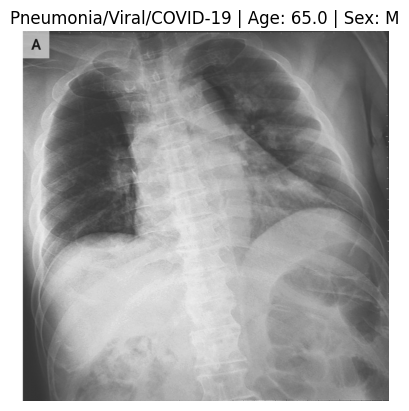

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os

# Load metadata
df = pd.read_csv("../data/covid-chestxray-dataset/metadata.csv")
print(df.head())

# Pick one sample
row = df.iloc[0]
image_path = os.path.join("../data/covid-chestxray-dataset/images", row["filename"])

# Load and show image
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap="gray")
plt.title(f"{row['finding']} | Age: {row['age']} | Sex: {row['sex']}")
plt.axis("off")
plt.show()


In [8]:
import torch
import sys
sys.path.append("../src")  # so Python can find src/

from dataset import CXRMultimodalDataset
from torch.utils.data import DataLoader

# Paths
csv_file = "../data/covid-chestxray-dataset/metadata.csv"
images_dir = "../data/covid-chestxray-dataset/images"

dataset = CXRMultimodalDataset(csv_file, images_dir)
dataloader = DataLoader(dataset, batch_size=4, shuffle=True)

# Fetch a batch
batch = next(iter(dataloader))
print("Image batch shape:", batch['image'].shape)
print("Metadata batch shape:", batch['metadata'].shape)
print("Label batch shape:", batch['label'].shape)


Image batch shape: torch.Size([4, 1, 224, 224])
Metadata batch shape: torch.Size([4, 2])
Label batch shape: torch.Size([4])


In [9]:
import torch
import sys
sys.path.append("../src")

from image_encoder import ImageEncoder

# Create model
img_encoder = ImageEncoder(output_dim=128)
img_encoder.eval()  # eval mode for testing

# Get one batch of images
images = batch['image']  # shape: [4, 1, 224, 224]

# ResNet expects 3 channels → repeat grayscale channel
images_rgb = images.repeat(1, 3, 1, 1)  # shape: [4, 3, 224, 224]

# Forward pass
with torch.no_grad():
    features = img_encoder(images_rgb)

print("Encoded feature shape:", features.shape)


Encoded feature shape: torch.Size([4, 128])
